In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima


In [ ]:
final_df = pd.read_csv("/content/train.csv")
final_df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43770,31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
43771,31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
43772,31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0
43773,31-12-2019 22:00,1130.4575,26.166895,0.017965,0.018486,13.420656,24.112207,0.017393,0.020386,3.872397,22.862207,0.016401,0.055557,3.843736,22,1,0


In [ ]:
final_df['datetime']=pd.to_datetime(final_df['datetime'])
final_df['week_day']=final_df['datetime'].dt.dayofweek
final_df['date']=final_df['datetime'].dt.day
final_df['month']=final_df['datetime'].dt.month
final_df['hour']=final_df['datetime'].dt.hour
final_df=final_df.set_index('datetime')

In [ ]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)
    
    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)
    
    df['nat_demand3']=df['nat_demand'].shift(3).fillna(0)
    df['nat_demand4']=df['nat_demand'].shift(4).fillna(0)
    df['nat_demand5']=df['nat_demand'].shift(5).fillna(0)
    df['nat_demand6']=df['nat_demand'].shift(6).fillna(0)
    df['nat_demand7']=df['nat_demand'].shift(7).fillna(0)
    df['nat_demand8']=df['nat_demand'].shift(8).fillna(0)
    df['nat_demand9']=df['nat_demand'].shift(9).fillna(0)
    df['nat_demand10']=df['nat_demand'].shift(10).fillna(0)
    df['nat_demand11']=df['nat_demand'].shift(11).fillna(0)
    df['nat_demand12']=df['nat_demand'].shift(12).fillna(0)
    df['nat_demand13']=df['nat_demand'].shift(13).fillna(0)
    df['nat_demand14']=df['nat_demand'].shift(14).fillna(0)
    return df

In [ ]:
final_df=add_features(final_df)
final_df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,nat_demand5,nat_demand6,nat_demand7,nat_demand8,nat_demand9,nat_demand10,nat_demand11,nat_demand12,nat_demand13,nat_demand14
datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,...,1272.5977,1264.0997,1292.4334,1343.1807,1321.3808,1241.3650,1194.5365,1099.1508,1049.8719,1015.7316
2019-12-31 20:00:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,...,1250.3840,1272.5977,1264.0997,1292.4334,1343.1807,1321.3808,1241.3650,1194.5365,1099.1508,1049.8719
2019-12-31 21:00:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,...,1223.4536,1250.3840,1272.5977,1264.0997,1292.4334,1343.1807,1321.3808,1241.3650,1194.5365,1099.1508


In [ ]:
result = adfuller(final_df['nat_demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print('Time series is not stationary.')
else:
    print('Time series is stationary.')

ADF Statistic: -21.344773
p-value: 0.000000
Time series is stationary.


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


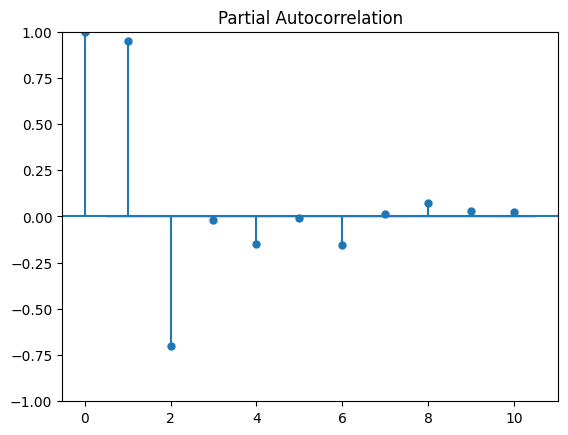

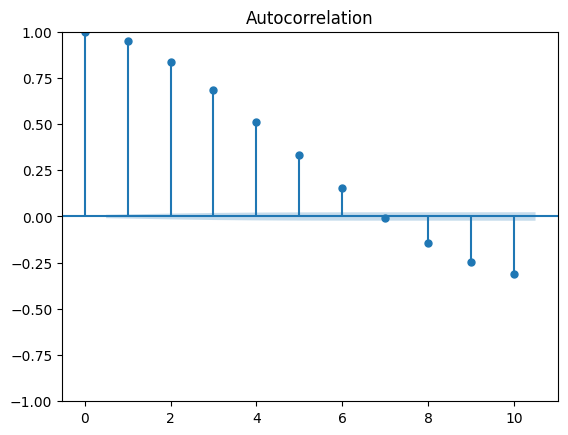

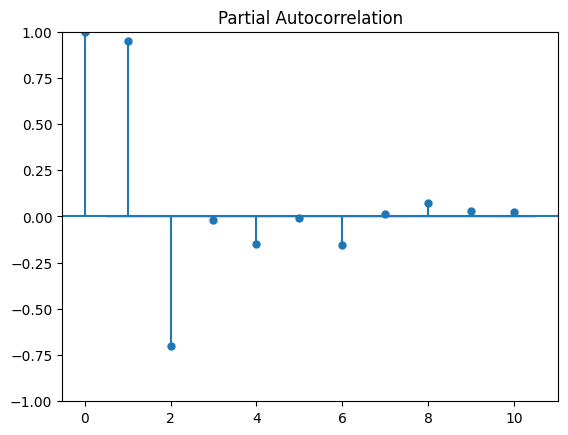

In [ ]:
plot_acf(final_df['nat_demand'],lags=10)
plot_pacf(final_df['nat_demand'],lags=10)

In [ ]:
scaler = StandardScaler()
exog = scaler.fit_transform(final_df.drop(['nat_demand'], axis=1))

In [ ]:
train_size = int(len(final_df) * 0.95)
train, test = final_df[:train_size], final_df[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

In [ ]:
model = pm.auto_arima(train['nat_demand'],X=exog_train,error_action='ignore',  suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=412258.526, Time=515.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=418661.589, Time=12.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=412701.493, Time=340.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=413170.646, Time=503.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=418659.595, Time=144.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=412627.373, Time=540.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=527.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=412803.260, Time=561.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=530.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=412711.077, Time=466.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=540.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=493.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=412710.173, Time=568.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=412255.591, Time=491.23 sec
 ARIMA

In [ ]:
pred=model.predict(n_periods=len(exog_test), X=exog_test, alpha=0.05)
pred

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


41586    1329.325663
41587    1318.416354
41588    1291.795326
41589    1252.024975
41590    1219.189348
            ...     
43770    1188.607882
43771    1169.998557
43772    1171.332848
43773     769.330086
43774     605.289450
Length: 2189, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
mse = mean_squared_error(test['nat_demand'], pred)
mae=mean_absolute_error(test['nat_demand'],pred)
mape=mean_absolute_percentage_error(test['nat_demand'],pred)
rmse = np.sqrt(mse)
print('mean squared error: ',mse)
print('root mean squared error: ',rmse)
print('mean absolute error: ',mae)
print('mean absolute pourcentage error : ',mape)

mean squared error:  18094.818711178737
root mean squared error:  134.5169829842267
mean absolute error:  110.59133155015914
mean absolute pourcentage error :  0.09011474444360695


In [ ]:
df = pd.DataFrame(pred, columns=['predicted'])
df=df.set_index(final_df[-2189:].index)
df['actuals']=test['nat_demand']
df

,predicted,actuals
datetime,,
2019-01-10 19:00:00,1329.325663,1323.7985
2019-01-10 20:00:00,1318.416354,1317.4305
2019-01-10 21:00:00,1291.795326,1279.7020
2019-01-10 22:00:00,1252.024975,1174.5147
2019-01-10 23:00:00,1219.189348,1117.7620
...,...,...
2019-12-31 19:00:00,1188.607882,1301.6065
2019-12-31 20:00:00,1169.998557,1250.9634
2019-12-31 21:00:00,1171.332848,1193.6802


In [ ]:
index_list = list(range(0, 2189))
df3=df.set_index(pd.Index(index_list))
df3

,predicted,actuals
0,1329.325663,1323.7985
1,1318.416354,1317.4305
2,1291.795326,1279.7020
3,1252.024975,1174.5147
4,1219.189348,1117.7620
...,...,...
2184,1188.607882,1301.6065
2185,1169.998557,1250.9634
2186,1171.332848,1193.6802
2187,769.330086,1130.4575


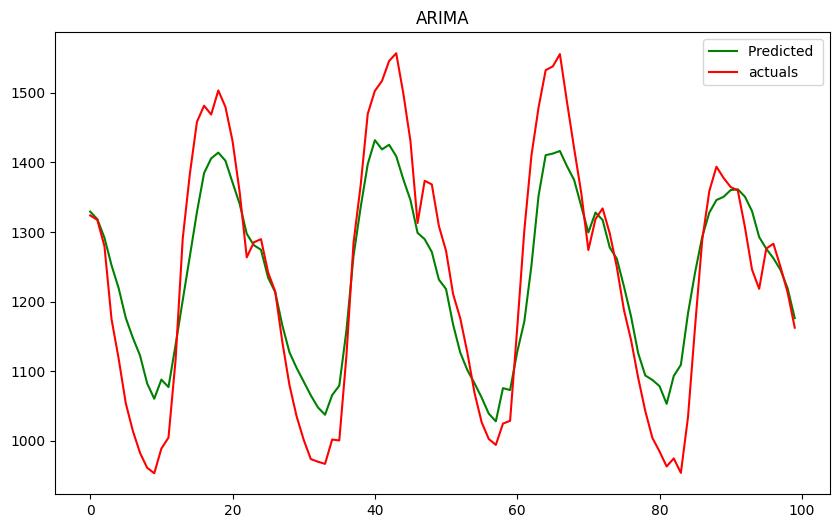

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(df3.iloc[:100,0], color= 'green',label = 'Predicted ')
plt.plot(df3.iloc[:100,1], color = 'red',label = 'actuals')
plt.title('ARIMA')
plt.legend()
plt.show()